# Install Java and Spark on Hadoop

In [1]:
# install java
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# install spark (change the version number if needed)
!wget -q https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# unzip the spark file to the current folder
!tar xf spark-3.3.2-bin-hadoop3.tgz

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.


'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'spark-3.3.2-bin-hadoop3.tgz'


In [2]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [3]:
# pip install findspark
import findspark
findspark.init()


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Exception: Unable to find py4j in /content/spark-3.3.2-bin-hadoop3\python, your SPARK_HOME may not be configured correctly

# Create a SparkSession in Python

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local")\
          .appName("Introduction to Spark")\
          .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12") \
          .getOrCreate()

In [ ]:
# Import necessary libraries
from pyspark.sql.functions import col, column, expr
from pyspark.sql import functions as f

# Exercise 1: Data query with Spark DataFrame

---



##0. Load the data file: movies.json

In [ ]:
!git clone https://github.com/nnthaofit/CSC14118.git

Cloning into 'CSC14118'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 816.70 KiB | 1.82 MiB/s, done.


In [ ]:
df = spark.read.json("CSC14118/movies.json") 

In [ ]:
df.show(10, truncate=False)

+-------------+--------------------+-------------------------------------------+----+
|cast         |genres              |title                                      |year|
+-------------+--------------------+-------------------------------------------+----+
|[]           |[]                  |After Dark in Central Park                 |1900|
|[]           |[]                  |Boarding School Girls' Pajama Parade       |1900|
|[]           |[]                  |Buffalo Bill's Wild West Parad             |1900|
|[]           |[]                  |Caught                                     |1900|
|[]           |[]                  |Clowns Spinning Hats                       |1900|
|[]           |[Short, Documentary]|Capture of Boer Battery by British         |1900|
|[]           |[]                  |The Enchanted Drawing                      |1900|
|[Paul Boyton]|[]                  |Feeding Sea Lions                          |1900|
|[]           |[Comedy]            |How to Make a Fat 

## 1a. Show the schema of DataFrame that stores the movies dataset.

In [ ]:
df.schema

StructType([StructField('cast', ArrayType(StringType(), True), True), StructField('genres', ArrayType(StringType(), True), True), StructField('title', StringType(), True), StructField('year', LongType(), True)])

In [ ]:
df.printSchema()

root
 |-- cast: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- title: string (nullable = true)
 |-- year: long (nullable = true)



## 1b. Show the number of distinct films in the dataset

In [ ]:
df.selectExpr("count(distinct( cast, genres, title, year))").show(2)

+----------------------------------------------------------------------------------+
|count(DISTINCT named_struct(cast, cast, genres, genres, title, title, year, year))|
+----------------------------------------------------------------------------------+
|                                                                             28789|
+----------------------------------------------------------------------------------+



In [ ]:
df.selectExpr("count(distinct( cast, genres, title, year))").first()[0]

28789

In [ ]:
df.distinct().count()

28789

## 2. Count the number of movies released during the years 2012 and 2015 (included)

In [ ]:
df.where("year >=2012 AND year <=2015").count()

1015

## 3. Show the year in which the number of movies released is highest. One highest year is enough

In [ ]:
df1=df.groupBy("year").count()

In [ ]:
df1.show()

+----+-----+
|year|count|
+----+-----+
|1950|  443|
|1919|  634|
|1936|  504|
|1951|  429|
|1958|  281|
|1921|  143|
|1983|  140|
|1905|   35|
|1972|  140|
|1979|  139|
|2007|  304|
|1988|  292|
|2014|  214|
|1908|   18|
|1986|  192|
|1949|  351|
|1930|  361|
|1969|  137|
|1964|  151|
|1967|  127|
+----+-----+
only showing top 20 rows



In [ ]:
df1.sort(col("count").desc()).show(1)

+----+-----+
|year|count|
+----+-----+
|1919|  634|
+----+-----+
only showing top 1 row



In [ ]:
f.max(df1['count'])

Column<'max(count)'>

## 4. Show the list of movies such that for each film, the number of actors/actresses is at least five, and the number of genres it belongs to is at most two genres.

In [ ]:
df.where((f.size(df.cast)>=5)&(f.size(df.genres)<=2)).show()

+--------------------+----------------+--------------------+----+
|                cast|          genres|               title|year|
+--------------------+----------------+--------------------+----+
|[Earle Foxe, Alie...|         [Drama]|  A Desperate Chance|1913|
|[Charlotte Burton...|         [Drama]|    The Archeologist|1914|
|[Charlotte Burton...|         [Drama]|At the Potter's W...|1914|
|[Herbert Tracey, ...|        [Comedy]|    Back to the Farm|1914|
|[Charlotte Burton...|              []|    The Beggar Child|1914|
|[William Garwood,...|              []|       Billy's Rival|1914|
|[B. Reeves Eason,...|         [Drama]| Break, Break, Break|1914|
|[Charlotte Burton...|              []|       The Butterfly|1914|
|[Charlotte Burton...|       [Western]|Calamity Anne's L...|1914|
|[Charlie Chaplin,...|        [Comedy]|    The Star Boarder|1914|
|[Sydney Ayres, Ja...|              []|A Story of Little...|1914|
|[Sydney Ayres, Pe...|              []|The Story of the ...|1914|
|[Charlott

## 5. Show the **movies** whose names are longest

In [ ]:
df.orderBy(f.length(col('title')).desc()).limit(1).show()

+----+------+--------------------+----+
|cast|genres|               title|year|
+----+------+--------------------+----+
|  []|    []|Cornell-Columbia-...|1901|
+----+------+--------------------+----+



## 6. Show the movies whose name contains the word “fighting” (case-insensitive).

In [ ]:
df.filter(f.lower(col('title')).contains('fighting')).show()

+--------------------+---------------+--------------------+----+
|                cast|         genres|               title|year|
+--------------------+---------------+--------------------+----+
|[Bessie Love, Ann...|[Comedy, Drama]|  A Fighting Colleen|1919|
|[Blanche Sweet, R...|      [Western]|     Fighting Cressy|1919|
|[Harry T. Morey, ...|        [Drama]|    Fighting Destiny|1919|
|[Tom Mix, Teddy S...|      [Western]|   Fighting for Gold|1919|
|[Jack Perrin, Hoo...|      [Western]|  The Fighting Heart|1919|
|[Art Acord, Mildr...|      [Western]|   The Fighting Line|1919|
|[William Duncan, ...|       [Action]|  The Fighting Guide|1922|
|[Tom Mix, Patsy R...|      [Western]| The Fighting Streak|1922|
|[Richard Barthelm...|   [Historical]|  The Fighting Blade|1923|
|[Ernest Torrence,...|       [Comedy]| The Fighting Coward|1924|
|[Jack Hoxie, Hele...|      [Western]|       Fighting Fury|1924|
|[Pat O'Malley, Ma...|        [Drama]|The Fighting Adve...|1924|
|[Fred Thomson, Ha...|   

## 7. Show the list of distinct genres appearing in the dataset


In [ ]:
df.select(f.explode(col('genres'))).distinct().show()

+-------------+
|          col|
+-------------+
|        Crime|
|      Romance|
|     Thriller|
|      Slasher|
|Found Footage|
|    Adventure|
|         Teen|
| Martial Arts|
|       Sports|
|        Drama|
|          War|
|  Documentary|
|       Family|
|      Fantasy|
|       Silent|
|     Disaster|
|        Legal|
|      Mystery|
| Supernatural|
|     Suspense|
+-------------+
only showing top 20 rows



## 8. List all movies in which the actor Harrison Ford has participated.

In [ ]:
df.filter(f.array_contains(col('cast'), 'Harrison Ford')).show()

+--------------------+-----------------+--------------------+----+
|                cast|           genres|               title|year|
+--------------------+-----------------+--------------------+----+
|[Constance Talmad...|[Romance, Comedy]|Experimental Marr...|1919|
|[Constance Talmad...|         [Comedy]| Happiness a la Mode|1919|
|[Constance Talmad...|         [Comedy]|Romance and Arabella|1919|
|[Vivian Martin, H...|         [Comedy]|      The Third Kiss|1919|
|[Harrison Ford, C...|         [Comedy]|The Veiled Adventure|1919|
|[Constance Talmad...|         [Comedy]|          Who Cares?|1919|
|[Vivian Martin, H...|          [Drama]|You Never Saw Suc...|1919|
|[Norma Talmadge, ...|          [Drama]| The Wonderful Thing|1921|
|[Alma Rubens, Har...|        [Mystery]|      Find the Woman|1922|
|[Constance Talmad...|          [Drama]| The Primitive Lover|1922|
|[Norma Talmadge, ...| [Romance, Drama]|     Smilin' Through|1922|
|[Helen Jerome Edd...|          [Drama]|     When Love Comes|1

## 9. List all movies in which the actors/actresses whose names include the word “Lewis“ (case-insensitive) have participated.

In [ ]:
df.withColumn('cast_str', f.array_join(col('cast'), ' ')) \
  .filter(f.lower(col('cast_str')).contains('lewis')) \
  .drop('cast_str') \
  .show()

+--------------------+-----------+--------------------+----+
|                cast|     genres|               title|year|
+--------------------+-----------+--------------------+----+
|[Charlotte Burton...|         []|       The Butterfly|1914|
|[Pearl White, She...|    [Drama]|The Exploits of E...|1914|
|[Charlotte Burton...|   [Comedy]| Mein Lieber Katrina|1914|
|[Norma Talmadge, ...|    [Drama]|      Going Straight|1916|
|[Dorothy Gish, Ra...|    [Drama]|Gretchen the Gree...|1916|
|[Ben Lewis, Bessi...|  [Western]|     A Sister of Six|1916|
|[Gail Kane, Lewis...|    [Drama]| The Bride's Silence|1917|
|    [Mitchell Lewis]|    [Drama]|Nine-Tenths of th...|1918|
|[Mitchell Lewis, ...|    [Drama]|The Faith of the ...|1919|
|[Mary Pickford, R...|   [Comedy]|         The Hoodlum|1919|
|[Mitchell Lewis, ...|    [Drama]|Jacques of the Si...|1919|
|[Mitchell Lewis, ...|    [Drama]|The Last of His P...|1919|
|[Lewis Stone, Jan...|    [Drama]|        Man's Desire|1919|
|[Mary Miles Minte...|  

## 10. Show top five actors/actresses that have participated in most movies.

In [ ]:
df.select(f.explode(col('cast')).alias('actor')) \
  .groupBy('actor') \
  .count() \
  .orderBy(f.desc('count')) \
  .limit(5) \
  .show()

+----------------+-----+
|           actor|count|
+----------------+-----+
|    Harold Lloyd|  190|
|     Hoot Gibson|  142|
|      John Wayne|  136|
|Charles Starrett|  116|
|    Bebe Daniels|  103|
+----------------+-----+



# Exercise 2: RDD-based mainpulation


*   The data is already in one ore more RDDs.
*   You must not convert RDD to DF or use pure Python code.





## 1. Consider a string s that includes only alphabetical letters and spaces. Check whether s is a palindrome (case-insensitive).

In [ ]:
def isPalin(s):
    # remove non-alphabetical characters and lower
    string = ''.join(char for char in s if char.isalnum()).lower()
    words = spark.sparkContext.parallelize(string)
    numRange = spark.sparkContext.parallelize(range(len(string)))
    return numRange.zip(words).sortBy(lambda pair:pair[0] * -1).values().collect() == words.collect()

In [ ]:
isPalin("Do geese see God?")

True

In [ ]:
isPalin("Do you see God?")

False

## 2. Consider a string s that includes only alphabetical letters and spaces. Check whether s is a pangram (case-insensitive).

In [ ]:
def isPangram(s):
    # remove non-alphabetical characters and lower
    string = ''.join(char for char in s if char.isalnum()).lower()
    words = spark.sparkContext.parallelize(string)
    return ''.join(words.groupBy(lambda c: c).sortBy(lambda c: c).keys().collect()) == 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
isPangram("The quick brown fox jumps over the lazy dog")

True

In [ ]:
isPangram("The quick brown fox jumps over the dog")

False

# Exercise 3: Frequent patterns and association rules mining

## 0. Load the data file: foodmart.csv


*  A record is a tuple of binary values {0, 1}, each of which denotes the presence of an item (1: bought, 0: not bought).



In [ ]:
!git clone https://github.com/nnthaofit/CSC14118.git

fatal: destination path 'CSC14118' already exists and is not an empty directory.


In [ ]:
df = spark.read.csv("CSC14118/foodmart.csv", header = True, inferSchema = True) 

## 1. Convert the given data to the format required by Spark MLlib FPGrowth.

In [ ]:
# Assuming the column names are correctly parsed from the header
items = df.columns

# Drop any rows with null values
data = df.na.drop()

# Convert the data to the format required by FP-Growth
# Create an array column with the itemsets
from pyspark.sql.functions import array, array_distinct
data = data.select(array_distinct(array(*[col(item) for item in items])).alias("items"))

In [ ]:
data.show()

+------+
| items|
+------+
|[1, 0]|
|[1, 0]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
|[0, 1]|
+------+
only showing top 20 rows



## 2.	Apply Spark MLlib FPGrowth to the formatted data. Mine the set of frequent patterns with the minimum support of 0.1. Mine the set of association rules with the minimum confidence of 0.9.

In [ ]:
from pyspark.ml.fpm import FPGrowth
fpGrowth = FPGrowth(itemsCol="items", minSupport=0.1, minConfidence=0.9)
model = fpGrowth.fit(data)

In [ ]:
freqItemsets = model.freqItemsets
freqItemsets.show()

+------+----+
| items|freq|
+------+----+
|   [1]|2107|
|[1, 0]|2107|
|   [0]|2127|
+------+----+



In [ ]:
associationRules = model.associationRules
associationRules.show()

+----------+----------+------------------+----+------------------+
|antecedent|consequent|        confidence|lift|           support|
+----------+----------+------------------+----+------------------+
|       [0]|       [1]|0.9905970850963799| 1.0|0.9905970850963799|
|       [1]|       [0]|               1.0| 1.0|0.9905970850963799|
+----------+----------+------------------+----+------------------+



# Exercise 4: Classification

##0. Load the data file: mushroom.csv
*   The data represents a collection of mushroom species. 
*   There are 8124 examples, each of which has 22 attributes and it is categorized into either “edible” (e) or “poisonous” (p) 


In [ ]:
!git clone https://github.com/nnthaofit/CSC14118.git

fatal: destination path 'CSC14118' already exists and is not an empty directory.


In [ ]:
df = spark.read.csv("CSC14118/mushrooms.csv", header = True, inferSchema = True) 

## 1.	Prepare the train and test sets following the ratio 8:2

In [ ]:
train, test = df.randomSplit([0.8, 0.2], 24)

In [ ]:
train.printSchema()

root
 |-- class: string (nullable = true)
 |-- cap-shape: string (nullable = true)
 |-- cap-surface: string (nullable = true)
 |-- cap-color: string (nullable = true)
 |-- bruises: string (nullable = true)
 |-- odor: string (nullable = true)
 |-- gill-attachment: string (nullable = true)
 |-- gill-spacing: string (nullable = true)
 |-- gill-size: string (nullable = true)
 |-- gill-color: string (nullable = true)
 |-- stalk-shape: string (nullable = true)
 |-- stalk-root: string (nullable = true)
 |-- stalk-surface-above-ring: string (nullable = true)
 |-- stalk-surface-below-ring: string (nullable = true)
 |-- stalk-color-above-ring: string (nullable = true)
 |-- stalk-color-below-ring: string (nullable = true)
 |-- veil-type: string (nullable = true)
 |-- veil-color: string (nullable = true)
 |-- ring-number: string (nullable = true)
 |-- ring-type: string (nullable = true)
 |-- spore-print-color: string (nullable = true)
 |-- population: string (nullable = true)
 |-- habitat: string 

## 2. Fit a decision tree model on the training set, using Spark MLlib DecisionTreeClassifier with default parameters

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

# Perform string indexing on the categorical features
dt_indexers = [
    StringIndexer(inputCol=column, outputCol=column + "_index", handleInvalid="keep")
    for column in train.columns
]

# Combine the indexed features into a single vector column
dt_assembler = VectorAssembler(inputCols=[column + "_index" for column in train.columns if column != "class"],
                            outputCol="features")

# Perform string indexing on the target variable
dt_class_indexer = StringIndexer(inputCol="class", outputCol="label")

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Create a pipeline to chain the stages together
dt_pipeline = Pipeline(stages=dt_indexers + [dt_class_indexer, dt_assembler, dt])

# Fit the model on the training data
dt_model = dt_pipeline.fit(train)

In [ ]:
# Apply the trained model on the test data to make predictions
dt_predictions = dt_model.transform(test)

# Show the predictions
dt_predictions.select("class", "prediction").sample(False, 0.01).limit(20).show()

+-----+----------+
|class|prediction|
+-----+----------+
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    e|       0.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
|    p|       1.0|
+-----+----------+



## 3. Fit a random forest model on the training set, using Spark MLlib RandomForestClassification with default parameters

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Perform string indexing on the categorical features
rf_indexers = [
    StringIndexer(inputCol=column, outputCol=column + "_index", handleInvalid="keep")
    for column in train.columns
]

# Combine the indexed features into a single vector column
rf_assembler = VectorAssembler(inputCols=[column + "_index" for column in train.columns if column != "class"],
                            outputCol="features")

# Perform string indexing on the target variable
rf_class_indexer = StringIndexer(inputCol="class", outputCol="label")

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline to chain the stages together
rf_pipeline = Pipeline(stages=rf_indexers + [rf_class_indexer, rf_assembler, rf])

# Fit the model on the training data
rf_model = rf_pipeline.fit(train)

In [ ]:
# Use the trained model to make predictions on the test data
rf_predictions = rf_model.transform(test)

# Show the predicted class labels and corresponding probabilities
rf_predictions.select("class", "prediction", "probability").sample(False, 0.01).limit(20).show(truncate=False)

+-----+----------+------------------------------------------+
|class|prediction|probability                               |
+-----+----------+------------------------------------------+
|e    |0.0       |[0.973209022574466,0.02679097742553402]   |
|e    |0.0       |[0.9796275803771992,0.020372419622800668] |
|e    |0.0       |[0.9701012877678362,0.029898712232163848] |
|e    |0.0       |[0.984140963712622,0.015859036287377986]  |
|e    |0.0       |[0.984140963712622,0.015859036287377986]  |
|e    |0.0       |[0.9722664545304559,0.02773354546954414]  |
|e    |0.0       |[0.9620099814350898,0.037990018564910216] |
|e    |0.0       |[0.971536274044453,0.028463725955547033]  |
|p    |1.0       |[0.0010710879772972387,0.9989289120227027]|
|p    |1.0       |[0.0010710879772972387,0.9989289120227027]|
|p    |1.0       |[0.0010710879772972387,0.9989289120227027]|
|p    |1.0       |[0.0043223195043908345,0.9956776804956092]|
|p    |1.0       |[0.0010710879772972387,0.9989289120227027]|
|p    |1

## 4. Evaluate the two models on the same test set using the following metrics: areaUnderROC and areaUnderPR

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate the decision tree model
dt_evaluator = BinaryClassificationEvaluator(labelCol="label")
dt_roc = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "areaUnderROC"})
dt_pr = dt_evaluator.evaluate(dt_predictions, {dt_evaluator.metricName: "areaUnderPR"})

# Print the evaluation results
print("Decision Tree Model")
print(f"Area under ROC: {dt_roc}")
print(f"Area under PR: {dt_pr}")


Decision Tree Model
Area under ROC: 0.998151690391459
Area under PR: 0.9990446811771919


In [ ]:
# Evaluate the random forest model
rf_evaluator = BinaryClassificationEvaluator(labelCol="label")
rf_roc = rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "areaUnderROC"})
rf_pr = rf_evaluator.evaluate(rf_predictions, {rf_evaluator.metricName: "areaUnderPR"})

# Print the evaluation results
print("Random Forest Model")
print(f"Area under ROC: {rf_roc}")
print(f"Area under PR: {rf_pr}")

Random Forest Model
Area under ROC: 1.0
Area under PR: 1.0


##5. Chain the above steps into a single pipeline

In [ ]:
# Define the feature columns
feature_columns = train.columns[1:]

# Perform string indexing on the class column
class_indexer = StringIndexer(inputCol="class", outputCol="label")

# Perform string indexing on the feature columns
indexers = [
    StringIndexer(inputCol=column, outputCol=column + "_index", handleInvalid="keep")
    for column in feature_columns
]

# Combine the indexed features into a single vector column
assembler = VectorAssembler(inputCols=[column + "_index" for column in feature_columns],
                            outputCol="features")


# Create a decision tree classifier and rename to avoid conflict
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features") \
                .setRawPredictionCol("dt_rawPrediction") \
                .setProbabilityCol("dt_probability") \
                .setPredictionCol("dt_prediction")

# Create a random forest classifier
rf_classifier = RandomForestClassifier(labelCol="label", featuresCol="features") \
                .setRawPredictionCol("rf_rawPrediction") \
                .setProbabilityCol("rf_probability") \
                .setPredictionCol("rf_prediction")

# Create the pipeline
pipeline = Pipeline(stages=indexers + [class_indexer, assembler, dt_classifier, rf_classifier])

# Fit the pipeline to the training data
model = pipeline.fit(train)

# Make predictions on the test data
predictions = model.transform(test)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
evaluator.setRawPredictionCol("dt_rawPrediction")
roc_dt = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
pr_dt = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
evaluator.setRawPredictionCol("rf_rawPrediction")
roc_rf = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
pr_rf = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})

# Print the evaluation results
print("Decision Tree Model")
print(f"Area under ROC: {roc_dt}")
print(f"Area under PR: {pr_dt}")
print()
print("Random Forest Model")
print(f"Area under ROC: {roc_rf}")
print(f"Area under PR: {pr_rf}")


Decision Tree Model
Area under ROC: 0.998151690391459
Area under PR: 0.9990446811771919

Random Forest Model
Area under ROC: 1.0
Area under PR: 1.0


# Exercise 5: Clustering

##0. Load the data file: iris.csv

*   The data represents a collection of iris plant species.
*   There are 150 examples, each of which has 4 attributes and it is categorized into one of the three classes.  

In [ ]:
!git clone https://github.com/nnthaofit/CSC14118.git

fatal: destination path 'CSC14118' already exists and is not an empty directory.


In [ ]:
df = spark.read.csv("CSC14118/iris.csv", header = True, inferSchema = True) 

In [ ]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



## 1.	Cluster the data by using Spark MLlib KMeans with k = 2, 3, and 5, using Euclidean distance and cosine distance

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Select the relevant columns for clustering
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a vector assembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Transform the DataFrame to include the feature vector column
data = assembler.transform(df)

# Define the values of k and distance metrics
k_values = [2, 3, 5]
distance_metrics = ['euclidean', 'cosine']

# Create an empty dictionary to store the models
models = {}

# Iterate over the k and distance metric combinations
for k in k_values:
    # Create a nested dictionary for each k value
    models[k] = {}
    
    for distance_metric in distance_metrics:
        # Create a KMeans instance
        kmeans = KMeans(k=k, distanceMeasure=distance_metric)
        
        # Fit the KMeans model on the data
        model = kmeans.fit(data)
        
        # Add the model to the nested dictionary
        models[k][distance_metric] = model

models

{2: {'euclidean': KMeansModel: uid=KMeans_e8215a770200, k=2, distanceMeasure=euclidean, numFeatures=4,
  'cosine': KMeansModel: uid=KMeans_ea3f4d7a452d, k=2, distanceMeasure=cosine, numFeatures=4},
 3: {'euclidean': KMeansModel: uid=KMeans_3c8f79e0b7d1, k=3, distanceMeasure=euclidean, numFeatures=4,
  'cosine': KMeansModel: uid=KMeans_ef9a89279e3a, k=3, distanceMeasure=cosine, numFeatures=4},
 5: {'euclidean': KMeansModel: uid=KMeans_6997dda3ca35, k=5, distanceMeasure=euclidean, numFeatures=4,
  'cosine': KMeansModel: uid=KMeans_5292d42ffd83, k=5, distanceMeasure=cosine, numFeatures=4}}

## 2. Evaluate each of the above clustering results using silhoutte score. Which configuration yeilds the best clustering?

In [ ]:
# Track the best configuration and its silhouette score
best_configuration = None
best_silhouette_score = float('-inf')

# Evaluate the clustering results
evaluator = ClusteringEvaluator()

# Iterate over the models and evaluate each one
for k, distance_metrics_dict in models.items():
    for distance_metric, model in distance_metrics_dict.items():
        # Make predictions on the data
        predictions = model.transform(data)
        
        # Evaluate the clustering results
        silhouette_score = evaluator.evaluate(predictions)
        
        # Print the evaluation results
        print(f"Model: k={k}, distance={distance_metric}")
        print(f"Silhouette Score: {silhouette_score}")
        print("------------------------------")

        # Check if this configuration has a better silhouette score
        if silhouette_score > best_silhouette_score:
            best_configuration = (k, distance_metric)
            best_silhouette_score = silhouette_score

# Print the best configuration and its silhouette score
print("Best Configuration:")
print(f"k={best_configuration[0]}, Distance Metric: {best_configuration[1]}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Model: k=2, distance=euclidean
Silhouette Score: 0.8501515983265806
------------------------------
Model: k=2, distance=cosine
Silhouette Score: 0.8462156076702896
------------------------------
Model: k=3, distance=euclidean
Silhouette Score: 0.6537609085337411
------------------------------
Model: k=3, distance=cosine
Silhouette Score: 0.6295595234430768
------------------------------
Model: k=5, distance=euclidean
Silhouette Score: 0.631233808045035
------------------------------
Model: k=5, distance=cosine
Silhouette Score: 0.4732362213519796
------------------------------
Best Configuration:
k=2, Distance Metric: euclidean
Best Silhouette Score: 0.8501515983265806


##3. Chain the above steps into a single pipeline

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Select the relevant columns for clustering
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a vector assembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Transform the DataFrame to include the feature vector column
data = assembler.transform(df)

# Define the values of k and distance metrics
k_values = [2, 3, 5]
distance_metrics = ['euclidean', 'cosine']

# Create a list to store the pipeline stages
pipeline_stages = []

# Iterate over the k and distance metric combinations
for k in k_values:
    for distance_metric in distance_metrics:
        # Create a KMeans instance
        kmeans = KMeans(k=k, distanceMeasure=distance_metric)
                
        # Create a column name for the prediction
        prediction_col = f"prediction_k{k}_{distance_metric}"
        
        # Set the prediction column name for the KMeans model
        kmeans = kmeans.setPredictionCol(prediction_col)

        # Add the KMeans model to the pipeline stages
        pipeline_stages.append(kmeans)

# Create a pipeline with the assembler and KMeans models
pipeline = Pipeline(stages=[assembler] + pipeline_stages)

# Fit the pipeline on the data
pipeline_model = pipeline.fit(df)

# Transform the data using the fitted pipeline
transformed_data = pipeline_model.transform(df)

# Evaluate the clustering results and calculate Silhouette scores
silhouette_scores = {}

for k in k_values:
    silhouette_scores[k] = {}
    
    for distance_metric in distance_metrics:
        # Get the prediction column name for the current configuration
        prediction_col = f"prediction_k{k}_{distance_metric}"
        
        # Evaluate the clustering using Silhouette score
        evaluator = ClusteringEvaluator(predictionCol=prediction_col, featuresCol='features', metricName='silhouette')
        score = evaluator.evaluate(transformed_data)
        
        # Store the Silhouette score in the dictionary
        silhouette_scores[k][distance_metric] = score

# Initialize variables to track the best configuration and score
best_configuration = None
best_score = -1.0

# Iterate over the Silhouette scores and find the best configuration
for k in k_values:
    for distance_metric in distance_metrics:
        score = silhouette_scores[k][distance_metric]
        print(f"For k={k} and distance metric={distance_metric}, the Silhouette score is {score}")
        
        # Check if the current score is higher than the previous best score
        if score > best_score:
            best_score = score
            best_configuration = (k, distance_metric)

# Print the best configuration and score
print(f"The best clustering configuration is k={best_configuration[0]} and distance metric={best_configuration[1]} with a Silhouette score of {best_score}")

For k=2 and distance metric=euclidean, the Silhouette score is 0.8501515983265806
For k=2 and distance metric=cosine, the Silhouette score is 0.8462156076702896
For k=3 and distance metric=euclidean, the Silhouette score is 0.6537609085337411
For k=3 and distance metric=cosine, the Silhouette score is 0.6295595234430768
For k=5 and distance metric=euclidean, the Silhouette score is 0.631233808045035
For k=5 and distance metric=cosine, the Silhouette score is 0.4732362213519796
The best clustering configuration is k=2 and distance metric=euclidean with a Silhouette score of 0.8501515983265806


## 4. For each clustering result obtained above, count the number of examples that belong to each of the three species. 

In [ ]:
# Iterate over the Silhouette scores and clustering results
for k in k_values:
    for distance_metric in distance_metrics:
        # Get the prediction column name for the current configuration
        prediction_col = f"prediction_k{k}_{distance_metric}"
        
        # Select the prediction column and the species column from the transformed data
        selected_data = transformed_data.select(prediction_col, 'Species')
        
        # Count the number of examples for each species in the current clustering result
        counts = selected_data.groupBy(prediction_col, 'Species').count()
        
        # Print the counts for the current clustering result
        print(f"Counts for k={k} and distance metric={distance_metric}:")
        counts.show()
        print()

Counts for k=2 and distance metric=euclidean:
+-----------------------+---------------+-----+
|prediction_k2_euclidean|        Species|count|
+-----------------------+---------------+-----+
|                      1| Iris-virginica|   50|
|                      0|    Iris-setosa|   50|
|                      1|Iris-versicolor|   47|
|                      0|Iris-versicolor|    3|
+-----------------------+---------------+-----+


Counts for k=2 and distance metric=cosine:
+--------------------+---------------+-----+
|prediction_k2_cosine|        Species|count|
+--------------------+---------------+-----+
|                   0| Iris-virginica|   50|
|                   0|Iris-versicolor|   50|
|                   1|    Iris-setosa|   50|
+--------------------+---------------+-----+


Counts for k=3 and distance metric=euclidean:
+-----------------------+---------------+-----+
|prediction_k3_euclidean|        Species|count|
+-----------------------+---------------+-----+
|                 

# Exercise 6: Network manipulation with Spark GraphFrames

##0. Load the data files: users.txt and followers.txt

In [ ]:
!git clone https://github.com/nnthaofit/CSC14118.git

fatal: destination path 'CSC14118' already exists and is not an empty directory.


In [ ]:
# Read the file into a DataFrame
users_df = spark.read.format("csv").option("header", "false").option("delimiter", ",").load("CSC14118/users.txt")

# Rename the columns
users_df = users_df.withColumnRenamed("_c0", "id").withColumnRenamed("_c1", "username").withColumnRenamed("_c2", "name")

# Show the DataFrame
users_df.show()


+---+-------------+---------------+
| id|     username|           name|
+---+-------------+---------------+
|  1|  BarackObama|   Barack Obama|
|  2|     ladygaga|Goddess of Love|
|  3|      jeresig|     John Resig|
|  4| justinbieber|  Justin Bieber|
|  6|matei_zaharia|  Matei Zaharia|
|  7|      odersky| Martin Odersky|
|  8|      anonsys|           null|
+---+-------------+---------------+



In [ ]:
# Read the file into a DataFrame
followers_df = spark.read.format("csv").option("header", "false").option("delimiter", " ").load("CSC14118/followers.txt")

# Rename the columns
followers_df = followers_df.withColumnRenamed("_c0", "src").withColumnRenamed("_c1", "dst")

# Show the DataFrame
followers_df.show()


+---+---+
|src|dst|
+---+---+
|  2|  1|
|  4|  1|
|  1|  2|
|  6|  3|
|  7|  3|
|  7|  6|
|  6|  7|
|  3|  7|
+---+---+



##1.	Construct a graph from the given data to demonstrate a tiny social network


In [ ]:
!pip install graphframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
from graphframes import GraphFrame

# Create the graph
graph = GraphFrame(users_df, followers_df)

# Print the vertices and edges
graph.vertices.show()
graph.edges.show()

+---+-------------+---------------+
| id|     username|           name|
+---+-------------+---------------+
|  1|  BarackObama|   Barack Obama|
|  2|     ladygaga|Goddess of Love|
|  3|      jeresig|     John Resig|
|  4| justinbieber|  Justin Bieber|
|  6|matei_zaharia|  Matei Zaharia|
|  7|      odersky| Martin Odersky|
|  8|      anonsys|           null|
+---+-------------+---------------+

+---+---+
|src|dst|
+---+---+
|  2|  1|
|  4|  1|
|  1|  2|
|  6|  3|
|  7|  3|
|  7|  6|
|  6|  7|
|  3|  7|
+---+---+



/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


##2.	Apply Graphs graphPageRank to the network to obtain a ranking list of users in terms of followers

In [ ]:
# Apply PageRank algorithm
pagerank = graph.pageRank(resetProbability=0.15, tol=0.01)

# Get the PageRank scores DataFrame
pagerank_scores = pagerank.vertices

# Sort the DataFrame by PageRank score in descending order
ranking = pagerank_scores.orderBy(pagerank_scores.pagerank.desc())

# Show the ranking list
ranking.show()

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-------------+---------------+-------------------+
| id|     username|           name|           pagerank|
+---+-------------+---------------+-------------------+
|  1|  BarackObama|   Barack Obama| 1.6799960991181582|
|  2|     ladygaga|Goddess of Love|  1.597343003059732|
|  7|      odersky| Martin Odersky| 1.4475660109319795|
|  3|      jeresig|     John Resig| 1.1216981830374868|
|  6|matei_zaharia|  Matei Zaharia|  0.794609271048275|
|  8|      anonsys|           null|0.17939371640218368|
|  4| justinbieber|  Justin Bieber|0.17939371640218368|
+---+-------------+---------------+-------------------+



##3. Find connected components on the graph, using Graphs connectedComponents or stronglyConnectedComponents

In [ ]:
# Set the checkpoint directory
spark.sparkContext.setCheckpointDir("/content/checkpoint_directory")

# Find the connected components
connected_components = graph.connectedComponents()

# Show the connected components
connected_components.show()

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-------------+---------------+-------------+
| id|     username|           name|    component|
+---+-------------+---------------+-------------+
|  1|  BarackObama|   Barack Obama|1236950581248|
|  2|     ladygaga|Goddess of Love|1236950581248|
|  3|      jeresig|     John Resig|  25769803776|
|  4| justinbieber|  Justin Bieber|1236950581248|
|  6|matei_zaharia|  Matei Zaharia|  25769803776|
|  7|      odersky| Martin Odersky|  25769803776|
|  8|      anonsys|           null| 223338299392|
+---+-------------+---------------+-------------+



In [ ]:
# Find the strongly connected components
strongly_connected_components = graph.stronglyConnectedComponents(maxIter=10)

# Show the strongly connected components
strongly_connected_components.show()

+---+-------------+---------------+-------------+
| id|     username|           name|    component|
+---+-------------+---------------+-------------+
|  8|      anonsys|           null| 223338299392|
|  4| justinbieber|  Justin Bieber|1425929142272|
|  6|matei_zaharia|  Matei Zaharia|  25769803776|
|  3|      jeresig|     John Resig|  25769803776|
|  1|  BarackObama|   Barack Obama|1236950581248|
|  7|      odersky| Martin Odersky|  25769803776|
|  2|     ladygaga|Goddess of Love|1236950581248|
+---+-------------+---------------+-------------+



### Verify

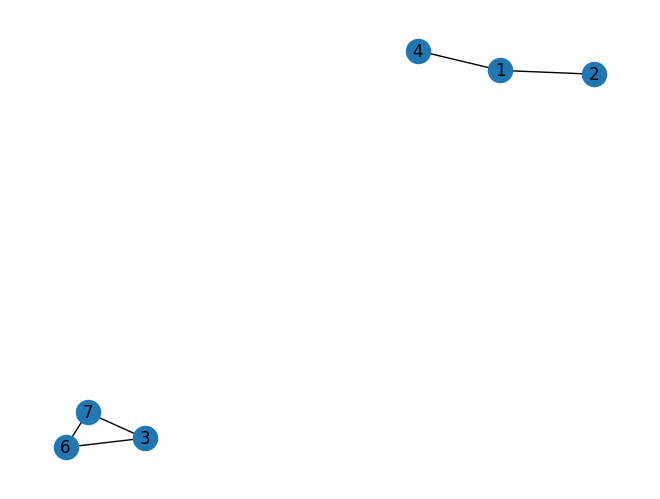

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph using the vertices and edges DataFrames
graph_plt = nx.from_pandas_edgelist(followers_df.toPandas(), 'src', 'dst')

# Draw the graph
nx.draw(graph_plt, with_labels=True)
plt.show()
